In [1]:
import numpy as np
import pandas as pd
#import json
#import django
#from django.db import models as md
import numpy as np
from sklearn import metrics
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
from sklearn import preprocessing
import math

from datetime import datetime
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.tsa.arima_model as arima_model

In [2]:
dataset =pd.read_csv("C:/Users/iroch/dev/toprocess/household_data_15min_singleindex.csv",parse_dates=[0],infer_datetime_format=True)

In [3]:
dataset.columns

Index(['utc_timestamp', 'cet_cest_timestamp', 'DE_KN_industrial1_grid_import',
       'DE_KN_industrial1_pv_1', 'DE_KN_industrial1_pv_2',
       'DE_KN_industrial2_grid_import', 'DE_KN_industrial2_pv',
       'DE_KN_industrial2_storage_charge',
       'DE_KN_industrial2_storage_decharge', 'DE_KN_industrial3_area_offices',
       'DE_KN_industrial3_area_room_1', 'DE_KN_industrial3_area_room_2',
       'DE_KN_industrial3_area_room_3', 'DE_KN_industrial3_area_room_4',
       'DE_KN_industrial3_compressor', 'DE_KN_industrial3_cooling_aggregate',
       'DE_KN_industrial3_cooling_pumps', 'DE_KN_industrial3_dishwasher',
       'DE_KN_industrial3_ev', 'DE_KN_industrial3_grid_import',
       'DE_KN_industrial3_machine_1', 'DE_KN_industrial3_machine_2',
       'DE_KN_industrial3_machine_3', 'DE_KN_industrial3_machine_4',
       'DE_KN_industrial3_machine_5', 'DE_KN_industrial3_pv_facade',
       'DE_KN_industrial3_pv_roof', 'DE_KN_industrial3_refrigerator',
       'DE_KN_industrial3_ventilation

In [4]:
resid4_pdata = dataset[["utc_timestamp",'DE_KN_residential4_dishwasher', 'DE_KN_residential4_ev','DE_KN_residential4_freezer', 'DE_KN_residential4_grid_export',\
                           'DE_KN_residential4_grid_import', 'DE_KN_residential4_heat_pump','DE_KN_residential4_pv', 'DE_KN_residential4_refrigerator',\
                           'DE_KN_residential4_washing_machine']]

In [5]:
resid4_pdata=resid4_pdata.fillna(value=0.0)
resid4_pdata

,utc_timestamp,DE_KN_residential4_dishwasher,DE_KN_residential4_ev,DE_KN_residential4_freezer,DE_KN_residential4_grid_export,DE_KN_residential4_grid_import,DE_KN_residential4_heat_pump,DE_KN_residential4_pv,DE_KN_residential4_refrigerator,DE_KN_residential4_washing_machine
0,2014-12-11 17:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014-12-11 18:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2014-12-11 18:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014-12-11 18:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014-12-11 18:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
153805,2019-05-01 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153806,2019-05-01 21:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153807,2019-05-01 21:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153808,2019-05-01 21:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
def totalload4(data):
  data["total_load_consume"] = data['DE_KN_residential4_dishwasher'] + data['DE_KN_residential4_ev'] + data['DE_KN_residential4_freezer'] + data['DE_KN_residential4_heat_pump'] + data['DE_KN_residential4_refrigerator'] + data['DE_KN_residential4_washing_machine'] 
  return data

In [7]:
resid4_pdata = totalload4(resid4_pdata)
resid4_pdata

,utc_timestamp,DE_KN_residential4_dishwasher,DE_KN_residential4_ev,DE_KN_residential4_freezer,DE_KN_residential4_grid_export,DE_KN_residential4_grid_import,DE_KN_residential4_heat_pump,DE_KN_residential4_pv,DE_KN_residential4_refrigerator,DE_KN_residential4_washing_machine,total_load_consume
0,2014-12-11 17:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014-12-11 18:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2014-12-11 18:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014-12-11 18:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014-12-11 18:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
153805,2019-05-01 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153806,2019-05-01 21:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153807,2019-05-01 21:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153808,2019-05-01 21:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
resid4_pdata =resid4_pdata.set_index('utc_timestamp')
resid4_pdata

,DE_KN_residential4_dishwasher,DE_KN_residential4_ev,DE_KN_residential4_freezer,DE_KN_residential4_grid_export,DE_KN_residential4_grid_import,DE_KN_residential4_heat_pump,DE_KN_residential4_pv,DE_KN_residential4_refrigerator,DE_KN_residential4_washing_machine,total_load_consume
utc_timestamp,,,,,,,,,,
2014-12-11 17:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-12-11 18:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-12-11 18:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-12-11 18:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-12-11 18:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2019-05-01 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-05-01 21:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-05-01 21:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


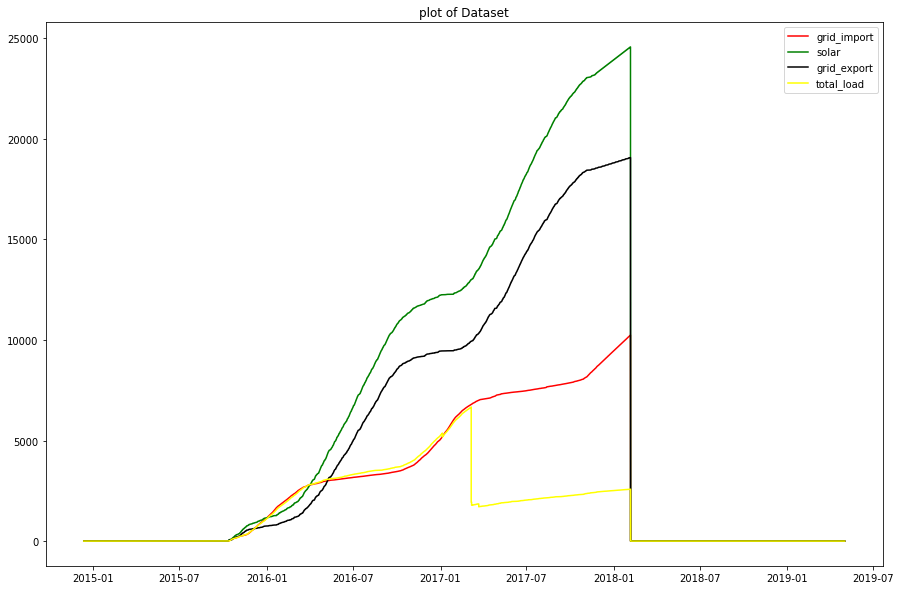

In [9]:
fig = plt.figure(figsize =(15,10))
plt.plot(resid4_pdata['DE_KN_residential4_grid_import'], label="grid_import",color='red')
plt.plot(resid4_pdata['DE_KN_residential4_pv'], label="solar",color='green')
plt.plot(resid4_pdata['DE_KN_residential4_grid_export'], label="grid_export",color='black')
plt.plot(resid4_pdata['total_load_consume'], label="total_load",color='yellow')
plt.legend()
plt.title("plot of Dataset")
plt.show()

<AxesSubplot:>

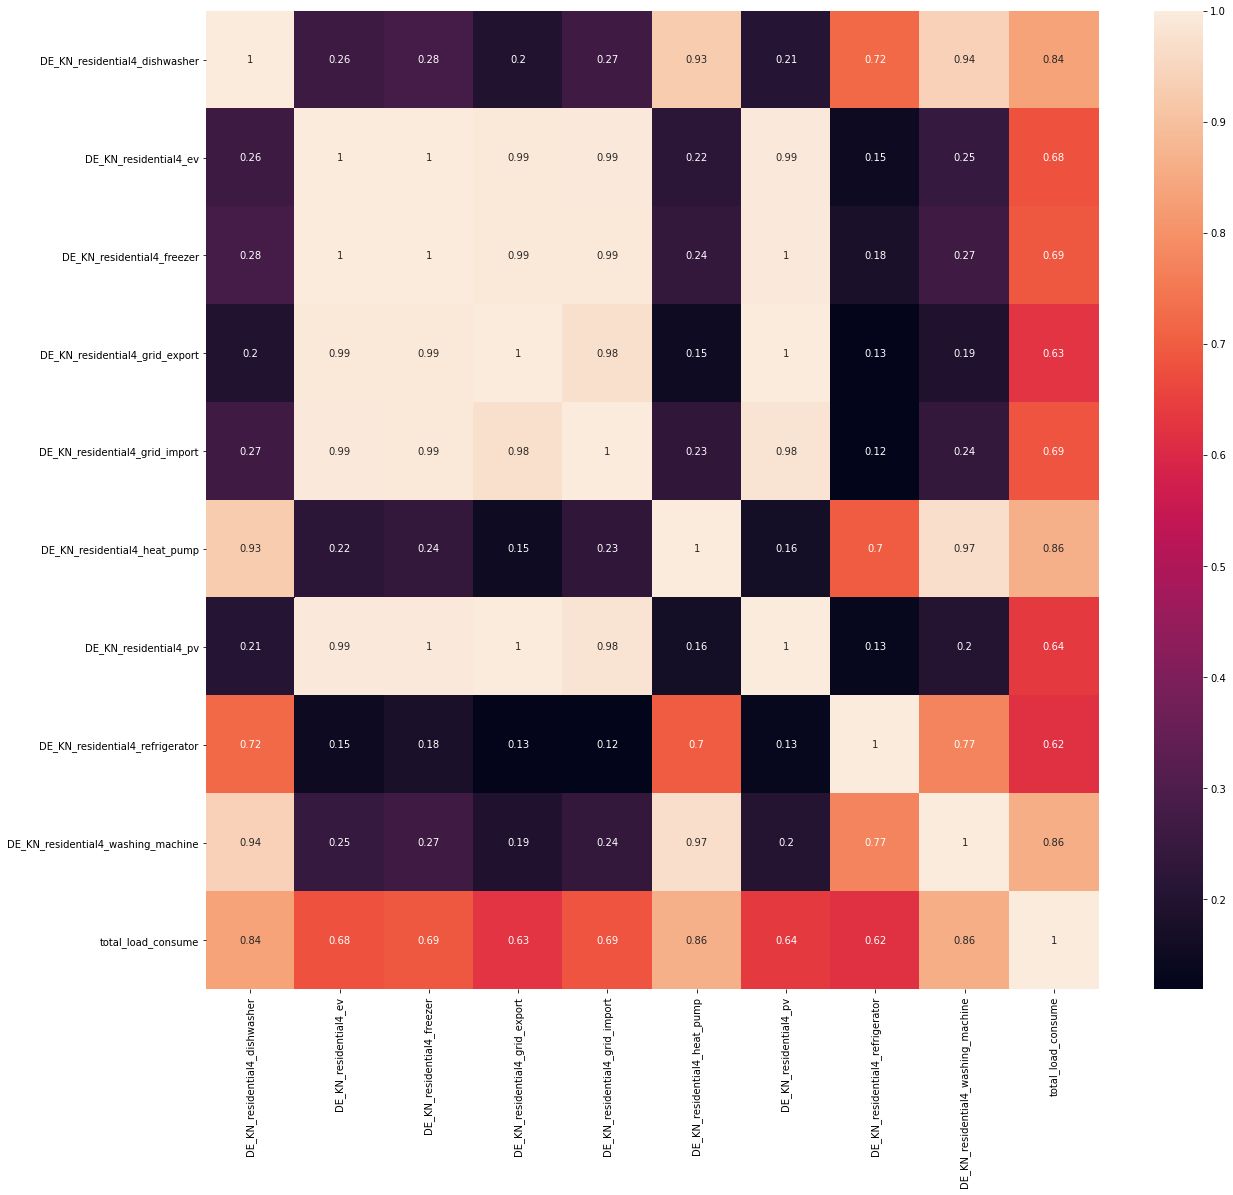

In [10]:
plt.figure(figsize=(20,18))
sns.heatmap(resid4_pdata.corr(),annot=True)

c:\users\iroch\thesisprojectnew\python36\my_project\venv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


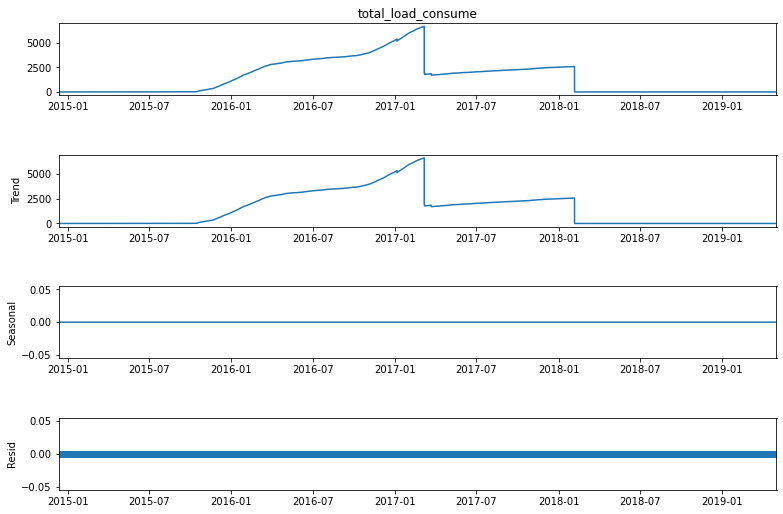

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(resid4_pdata['total_load_consume'],freq=True)
fig=decomposition.plot()
fig.set_size_inches(12,8)

In [10]:
def p_acfplots(datainput):
    fig = plt.figure(figsize=(12,8))
    #tick=np.arange(0,50)
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(datainput, lags=200, ax=ax1,alpha=0.05)
    #ax1.xaxis.set_ticks_position('bottom')
    fig.tight_layout();

    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(datainput, lags=200, ax=ax2,alpha=0.05)
    ax2.xaxis.set_ticks_position('bottom')
    fig.tight_layout();
    

In [11]:
def test_stationarity(timeseries,n):
    movingaverage=timeseries.rolling(window=n).mean()
    movingstd=timeseries.rolling(window=n).std()

    #fig=plt.figure(figsize=(10,10))
    #ax=datamn_test.plot(label='observed')
    
    tick=np.arange(0,len(timeseries.index))
    #ax.set_xticks(ticks)
    #ax.xticks(rotation=270)
    #ax.set_xticklabels(timeseries.index)
    
    #ax.xaxis_date(timeseries.index)
    
    
    
    #plt.xlim(0,len(timeseries.index))
    plt.title('Rolling mean & std & original data')
    #plt.xticks(tick,labels=timeseries.index,rotation=270)
    ax=timeseries.plot(label="original data",color="red")
    ax.figure.set_size_inches(12, 8)
    movingaverage.plot(ax=ax,color="green",label="Rolling mean",style='--')
    movingstd.plot(ax=ax,color="black",label="Rolling std")
    plt.legend(loc='best')
    #plt.savefig('datam.png',bbox_inches='tight')
    plt.show()
    
    #print('Result of Dickey-fuller Test:')
    #dftest=adfuller(timeseries.values, autolag='AIC')
    #dfoutput=pd.Series(dftest[0:4],index=['Test statistic','p-value','lags used','number of observations used'])
    #for key,value in dftest[4].items():
     #   dfoutput['critical value (%s)'%key]=value
    #print(dfoutput)


In [12]:
train = resid4_pdata.loc[:"2017-01-01 00:00:00","total_load_consume"]
test = resid4_pdata.loc["2017-01-01 00:00:00":,"total_load_consume"]
train

utc_timestamp
2014-12-11 17:45:00       0.000
2014-12-11 18:00:00       0.000
2014-12-11 18:15:00       0.000
2014-12-11 18:30:00       0.000
2014-12-11 18:45:00       0.000
                         ...   
2016-12-31 23:00:00    5260.949
2016-12-31 23:15:00    5261.266
2016-12-31 23:30:00    5261.470
2016-12-31 23:45:00    5261.498
2017-01-01 00:00:00    5261.989
Name: total_load_consume, Length: 72122, dtype: float64

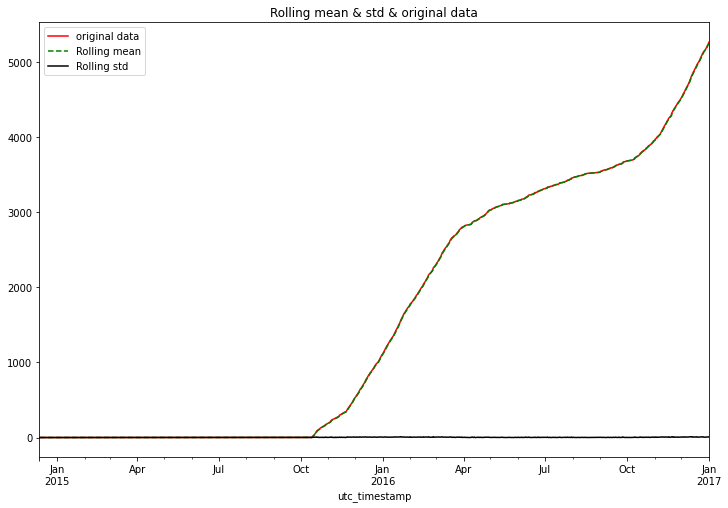

In [27]:
test_stationarity(train["2014-12-12 00:00:00":],96)

In [31]:
train

utc_timestamp
2014-12-11 17:45:00       0.000
2014-12-11 18:00:00       0.000
2014-12-11 18:15:00       0.000
2014-12-11 18:30:00       0.000
2014-12-11 18:45:00       0.000
                         ...   
2016-12-31 23:00:00    5260.949
2016-12-31 23:15:00    5261.266
2016-12-31 23:30:00    5261.470
2016-12-31 23:45:00    5261.498
2017-01-01 00:00:00    5261.989
Name: total_load_consume, Length: 72122, dtype: float64

In [13]:
diff_train = train.diff(periods=1).fillna(value=0.0)
diff_train1 =diff_train.diff(periods=1).fillna(value=0.0)
diff_train1

utc_timestamp
2014-12-11 17:45:00    0.000
2014-12-11 18:00:00    0.000
2014-12-11 18:15:00    0.000
2014-12-11 18:30:00    0.000
2014-12-11 18:45:00    0.000
                       ...  
2016-12-31 23:00:00   -0.360
2016-12-31 23:15:00    0.282
2016-12-31 23:30:00   -0.113
2016-12-31 23:45:00   -0.176
2017-01-01 00:00:00    0.463
Name: total_load_consume, Length: 72122, dtype: float64

In [15]:
import joblib 

In [16]:
joblib.dump(value=diff_train,filename= "./module.joblib", compress =True)

['./module.joblib']

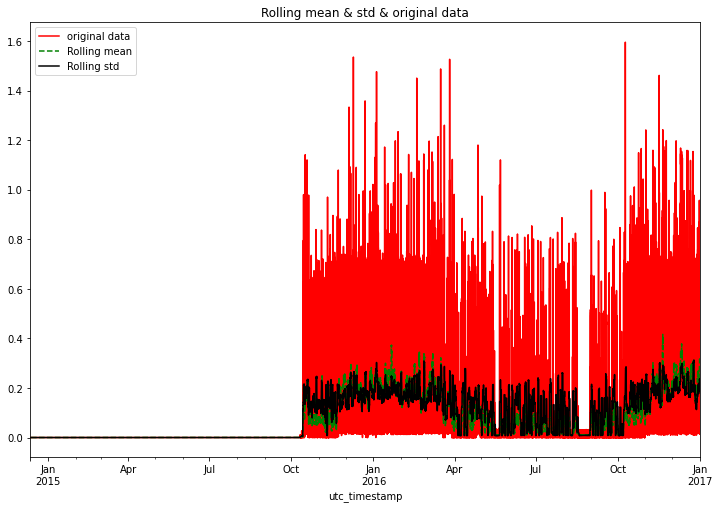

In [33]:
test_stationarity(diff_train["2014-12-12 00:00:00":],96)

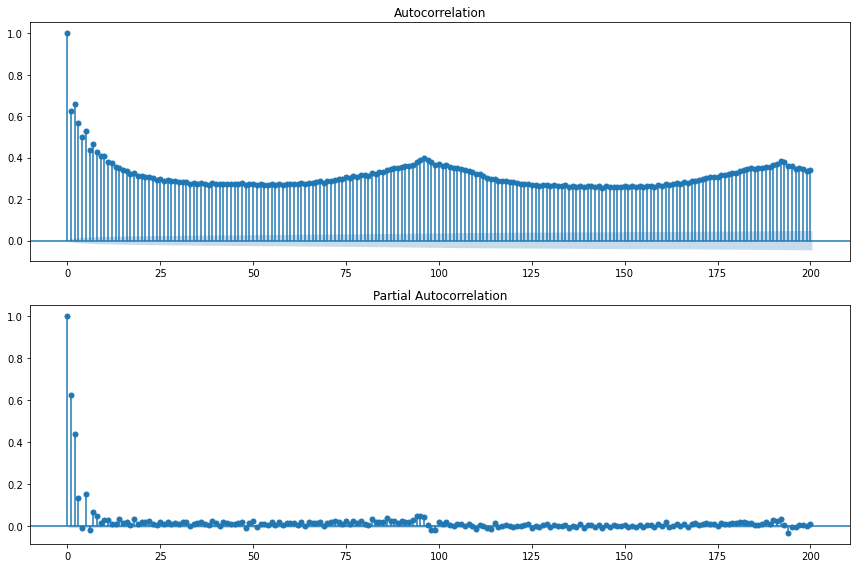

In [34]:
p_acfplots(diff_train)

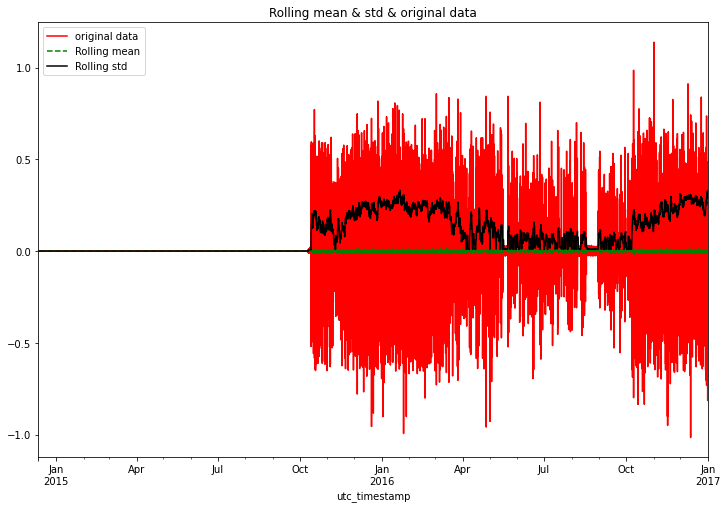

In [35]:
test_stationarity(diff_train1["2014-12-12 00:00:00":],96)

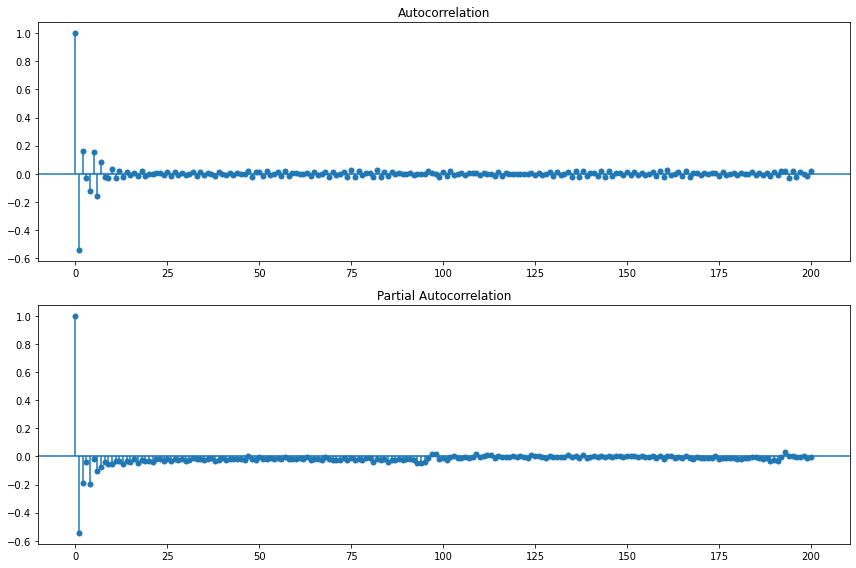

In [36]:
p_acfplots(diff_train1)

In [37]:
model =arima_model.ARIMA(endog=train,order=(2,1,2))

c:\users\iroch\thesisprojectnew\python36\my_project\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  % freq, ValueWarning)
c:\users\iroch\thesisprojectnew\python36\my_project\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  % freq, ValueWarning)


In [38]:
X =model.fit(method='css-mle')

ValueError: iterator is too large